In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_theme()

In [2]:
learning_dataset = {
    "宝贝当家": [45, 2, 9, "喜剧片"],
    "美人鱼": [21, 17, 5, "喜剧片"],
    "澳门风云3": [54, 9, 11, "喜剧片"],
    "功夫熊猫3": [39, 0, 31, "喜剧片"],
    "谍影重重": [5, 2, 57, "动作片"],
    "叶问3": [3, 2, 65, "动作片"],
    "伦敦陷落": [2, 3, 55, "动作片"],
    "我的特工爷爷": [6, 4, 21, "动作片"],
    "奔爱": [7, 46, 4, "爱情片"],
    "夜孔雀": [9, 39, 8, "爱情片"],
    "代理情人": [9, 38, 2, "爱情片"],
    "新步步惊心": [8, 34, 17, "爱情片"]
}

In [3]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.validation import check_X_y, check_is_fitted, check_array

class MyKNNClassfier(BaseEstimator, ClassifierMixin):
    def __init__(self, *, k = 5):
        self.k = k

    def fit(self, X, y, **kwargs):
        X, y = check_X_y(X, y)
        self.X_train_ = X
        self.y_train_ = y
        return self

    def predict(self, X):
        check_is_fitted(self)
        check_array(X)
        
        diff = np.tile(X[:, np.newaxis, :], (1, self.X_train_.shape[0], 1)) - self.X_train_
        dis = np.sqrt(np.sum(diff ** 2, axis=2))

        sorted_index = np.argsort(dis, axis=1)
        first_k_y = self.y_train_[sorted_index[:, :self.k]]

        return np.apply_along_axis(MyKNNClassfier.__find_most_frequent_element, 1, first_k_y)
    
    @staticmethod
    def __find_most_frequent_element(arr):
        unique_elements, counts = np.unique(arr, return_counts=True)
        most_frequent = unique_elements[np.argmax(counts)]
        return most_frequent

In [4]:
movie_test_data = { "老友记": [29, 10, 2, "？片"] }
movie_X_test = np.array([list(movie_test_data.values())[0][:3]])
movie_X_train = np.array(list(map(lambda row: row[:3], learning_dataset.values())))
movie_y_train = np.array(list(map(lambda row: row[3], learning_dataset.values())))

In [5]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

movie_pipeline = Pipeline([
    ('normalize', ColumnTransformer([
        ('scale_1', StandardScaler(), [0]),
        ('scale_2', StandardScaler(), [1]),
        ('scale_3', StandardScaler(), [2]),
    ])),
    ('KNN', MyKNNClassfier(k=5))
])

movie_pipeline

Pipeline(steps=[('normalize',
                 ColumnTransformer(transformers=[('scale_1', StandardScaler(),
                                                  [0]),
                                                 ('scale_2', StandardScaler(),
                                                  [1]),
                                                 ('scale_3', StandardScaler(),
                                                  [2])])),
                ('KNN', MyKNNClassfier())])

In [6]:
movie_pipeline.fit(movie_X_train, movie_y_train).predict(movie_X_test)

array(['喜剧片'], dtype='<U3')

In [7]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris_dataset = load_iris()
iris_X = iris_dataset.data
iris_y = iris_dataset.target

iris_X_train, iris_X_test, iris_y_train, iris_y_test = \
    train_test_split(iris_X, iris_y, test_size=0.2, random_state=0)

In [8]:
from sklearn.neighbors import KNeighborsClassifier

iris_pipeline = Pipeline([
    ('normalize', ColumnTransformer([
        ('scale_1', StandardScaler(), [0]),
        ('scale_2', StandardScaler(), [1]),
        ('scale_3', StandardScaler(), [2]),
    ])),
    ('KNN', KNeighborsClassifier(n_neighbors=5))
])
iris_pipeline

Pipeline(steps=[('normalize',
                 ColumnTransformer(transformers=[('scale_1', StandardScaler(),
                                                  [0]),
                                                 ('scale_2', StandardScaler(),
                                                  [1]),
                                                 ('scale_3', StandardScaler(),
                                                  [2])])),
                ('KNN', KNeighborsClassifier())])

In [9]:
iris_pipeline.fit(iris_X_train, iris_y_train).score(iris_X_test, iris_y_test)

0.8666666666666667

In [10]:
iris_X_predict = [
    [1.5 , 3 , 5.8 , 2.2],
    [6.2 , 2.9 , 4.3 , 1.3],
]

list(map(lambda x: iris_dataset.target_names[x], iris_pipeline.predict(iris_X_predict)))

['setosa', 'versicolor']

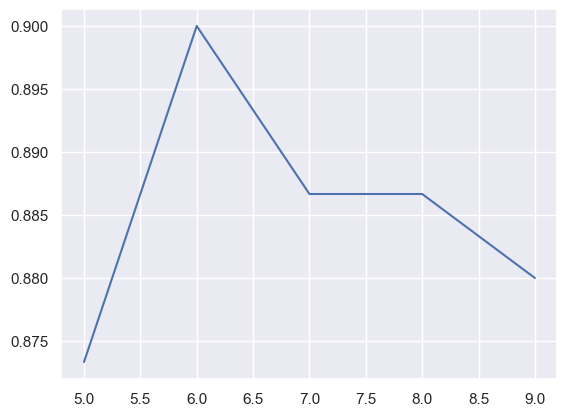

In [11]:
from sklearn.model_selection import cross_val_score

n_neighbors = np.arange(5, 10)

def calculate_score(n):
    return np.mean(cross_val_score(Pipeline([
        ('normalize', ColumnTransformer([
            ('scale_1', StandardScaler(), [0]),
            ('scale_2', StandardScaler(), [1]),
            ('scale_3', StandardScaler(), [2]),
        ])),
        ('KNN', KNeighborsClassifier(n_neighbors=n))
    ]), iris_X, iris_y, cv=10))

v_calculate_score = np.vectorize(calculate_score)
plt.plot(n_neighbors, v_calculate_score(n_neighbors))
plt.show()

In [12]:
tuned_model = Pipeline([
    ('normalize', ColumnTransformer([
        ('scale_1', StandardScaler(), [0]),
        ('scale_2', StandardScaler(), [1]),
        ('scale_3', StandardScaler(), [2]),
    ])),
    ('KNN', KNeighborsClassifier(n_neighbors=6))
])

tuned_model.fit(iris_X_train, iris_y_train)
list(map(lambda x: iris_dataset.target_names[x], tuned_model.predict(iris_X_predict)))

['setosa', 'versicolor']